<a href="https://colab.research.google.com/github/s-pike3/Projects_In_AI-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projects in AI & ML HW2 \\
Sarah Pike


Link to the dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for train/test split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import math

In [3]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [4]:
# Load data
df = pd.read_csv("loan_data.csv")
df.head()
len(df)

45000

In [5]:
#Split target variable from features
X1 = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [6]:
#one hot encoding for all categorical variables
X = pd.get_dummies(X1, columns=["person_gender","person_education","person_home_ownership","loan_intent"],dtype=int)
#Replace Yes and No with 1 and 0
X['previous_loan_defaults_on_file'] = X1['previous_loan_defaults_on_file'].replace({'Yes': 1, 'No': 0})
#Drop repetitive columns to avoid perfect multicollinearity
X.drop(['person_gender_male','person_education_Doctorate','person_home_ownership_OTHER','loan_intent_PERSONAL','person_age','person_home_ownership_MORTGAGE','person_education_Master'], axis=1, inplace=True)
X.head()



<ipython-input-6-c32ebe948bb0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['previous_loan_defaults_on_file'] = X1['previous_loan_defaults_on_file'].replace({'Yes': 1, 'No': 0})


,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_gender_female,person_education_Associate,person_education_Bachelor,person_education_High School,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_VENTURE
0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,0,0,0,0,1,0,0,0,0,0
1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,1,0,0,1,1,0,0,1,0,0,0
2,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,0,0,1,0,0,0,0,0,1,0
3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,0,1,0,0,1,0,0,0,1,0
4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,0,0,0,0,0,1,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#convert to numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

#check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36000, 19), (9000, 19), (36000,), (9000,))

In [8]:
#scale feature data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#compute metrics for model
def metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * precision * recall / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print(f'Precision: {precision:.4f}')
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    return precision, recall, f1, accuracy

## Task 1


Decision Tree

In [10]:
t1 = tree.DecisionTreeClassifier()
t1 = t1.fit(X_train, y_train)
y_pred = t1.predict(X_test)


In [11]:
tree1_results = metrics(y_test, y_pred)

Precision: 0.7786
Recall: 0.7934
F1 Score: 0.7859
Accuracy: 0.9040


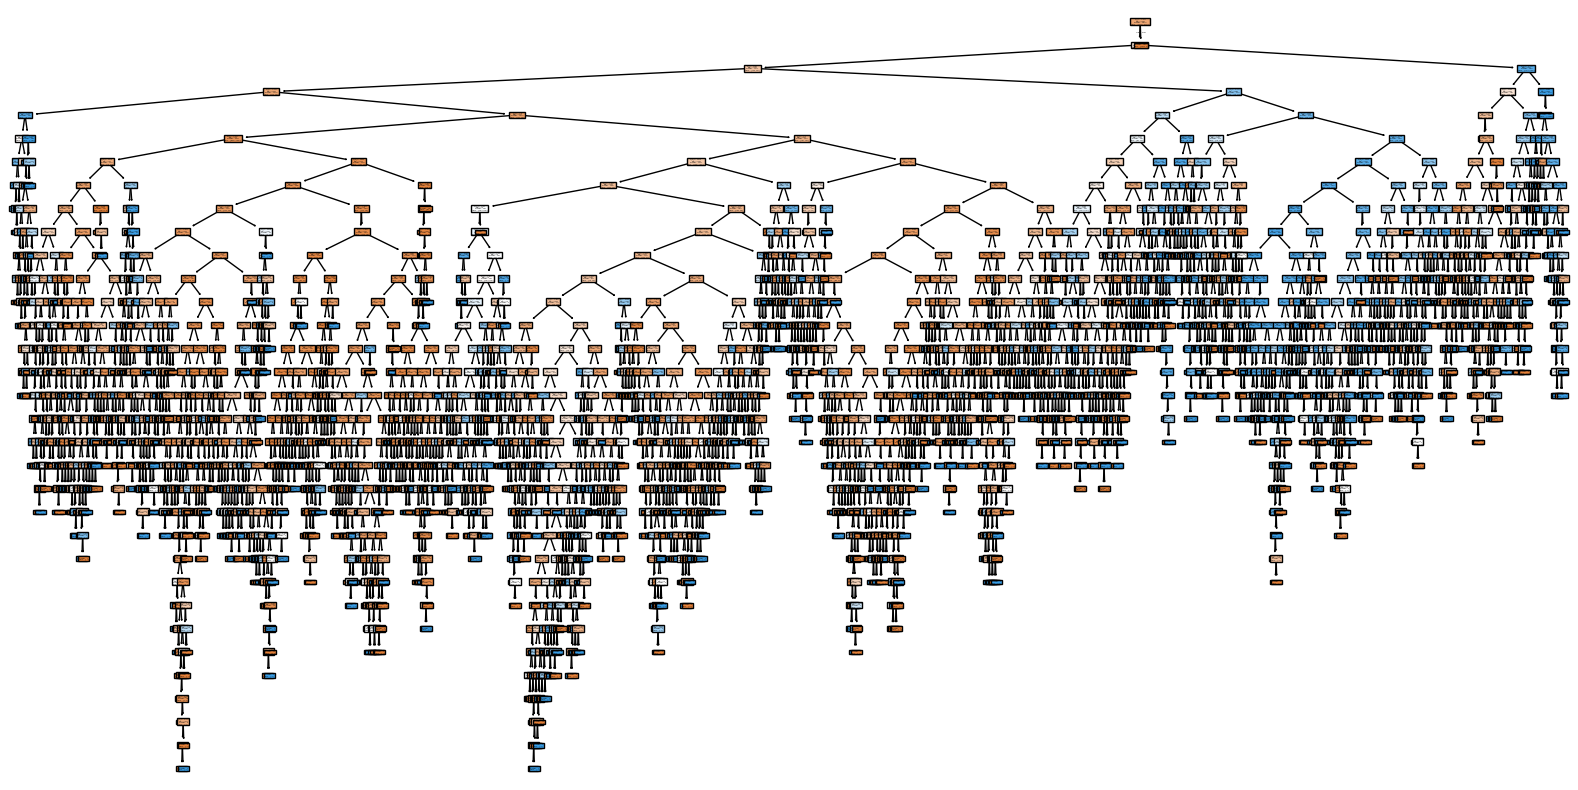

In [74]:
plt.figure(figsize=(20, 10))
tree.plot_tree(t1, filled=True)
plt.show()

In [48]:
t2 = tree.DecisionTreeClassifier(min_samples_leaf=25)
t2 = t2.fit(X_train, y_train)
y_pred = t2.predict(X_test)

In [49]:
tree2_results = metrics(y_test, y_pred)

Precision: 0.8442
Recall: 0.7714
F1 Score: 0.8062
Accuracy: 0.9192


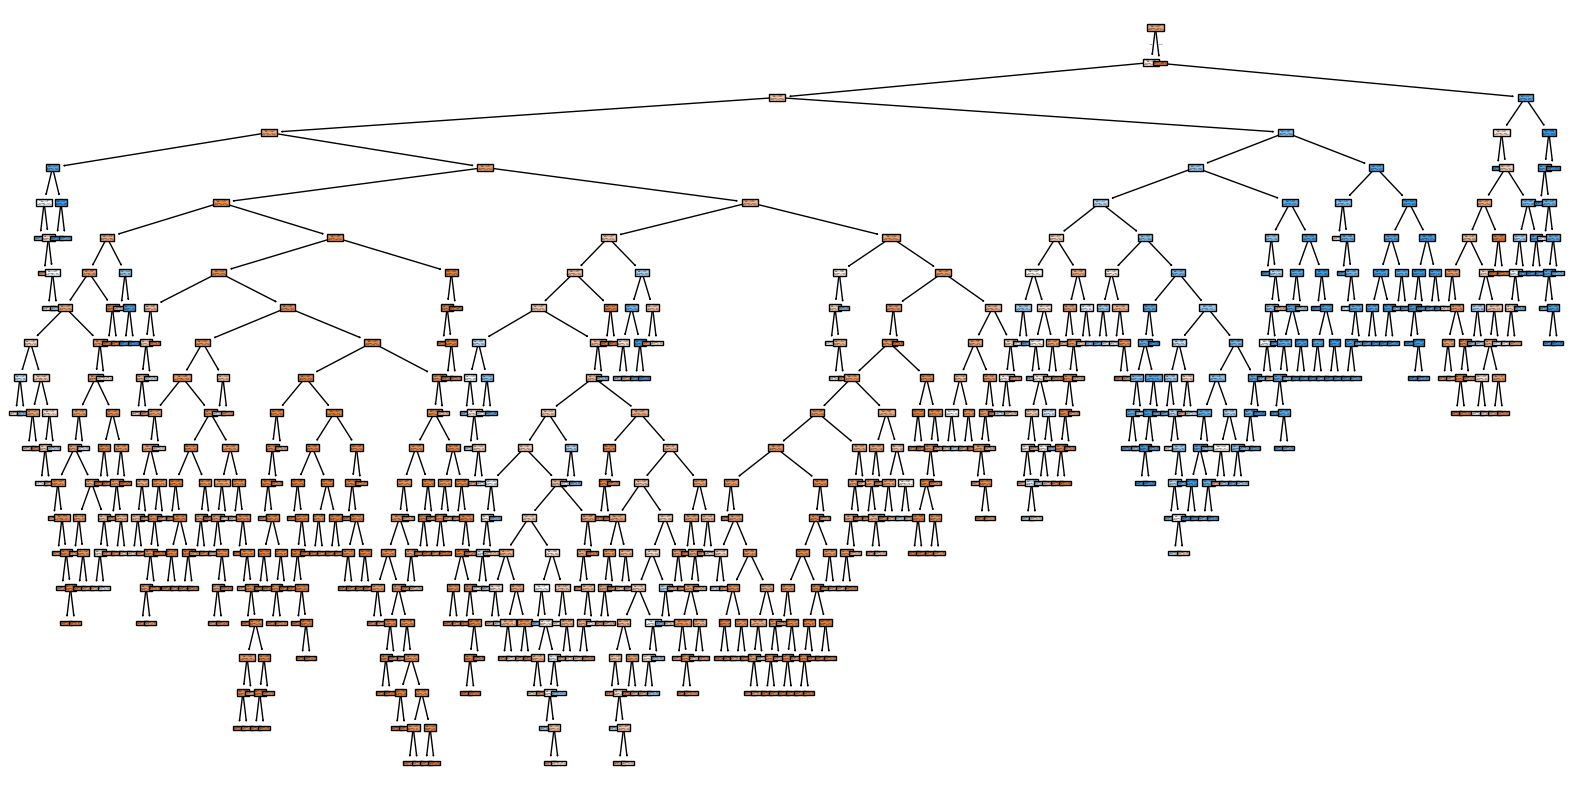

In [50]:
plt.figure(figsize=(20, 10))
tree.plot_tree(t2, filled=True)
plt.show()

In [10]:
t3 = tree.DecisionTreeClassifier(max_depth=10)
t3 = t3.fit(X_train, y_train)
y_pred = t3.predict(X_test)

In [11]:
tree3_results = metrics(y_test, y_pred)

Precision: 0.8965
Recall: 0.7307
F1 Score: 0.8051
Accuracy: 0.9208


In [12]:
skf = StratifiedKFold(n_splits=15)
t3cv15_results = cross_val_score(t3, X_train, y_train, cv=skf)
t3cv15 = np.mean(t3cv15_results)

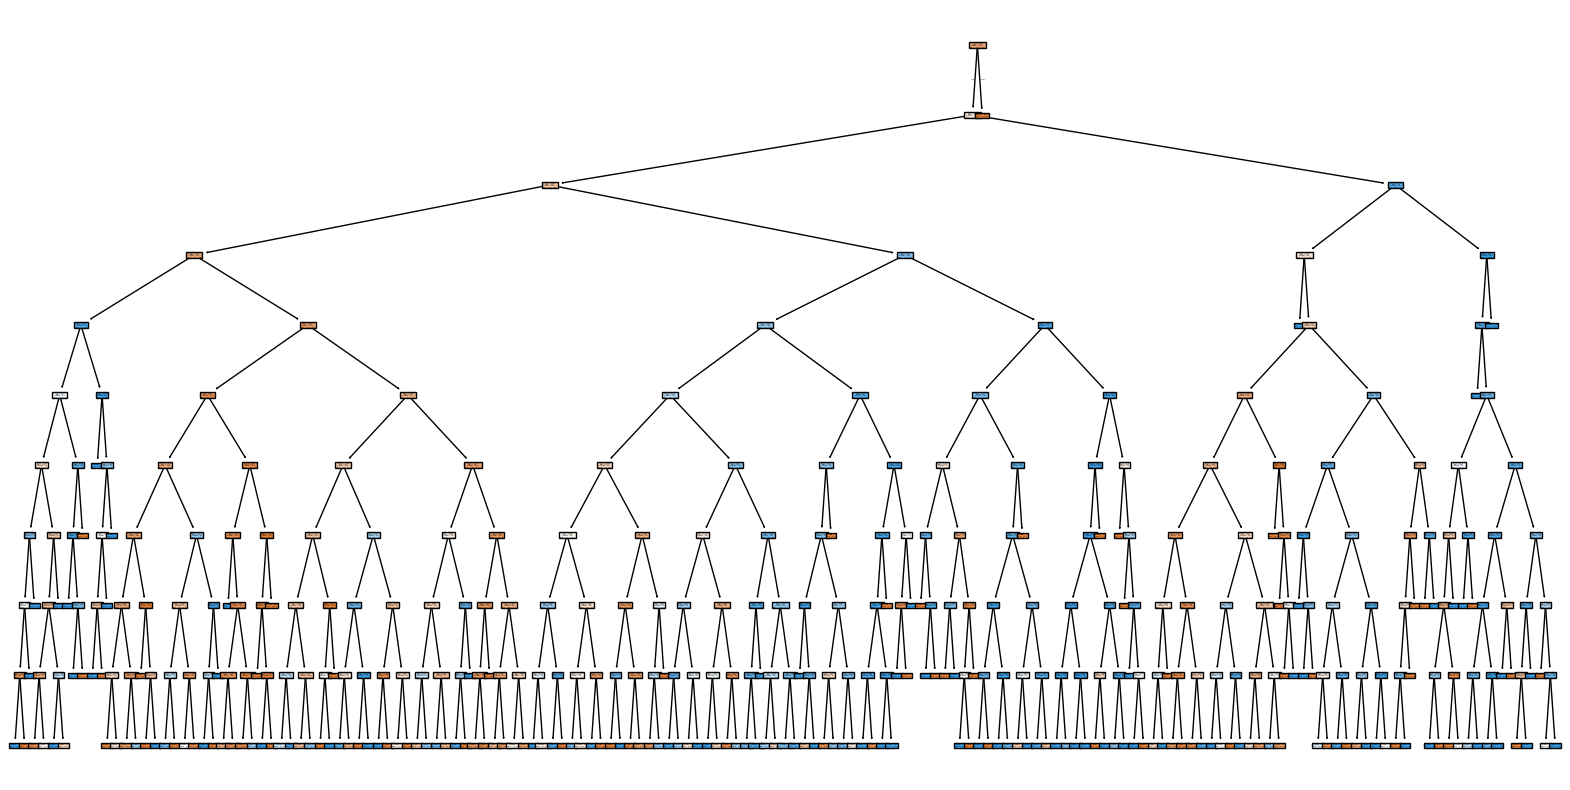

In [45]:
plt.figure(figsize=(20, 10))
tree.plot_tree(t3, filled=True)
plt.show()

The first tree is complex with highly varied depths. Controlling the minimun number of samples for a leaf (tree 2) decreases the depth and complexity of the tree, but still results in a large variation of depths for each of the leaf nodes. Limiting the maximum depth of the tree (tree 3) results in a more uniform depth and a less complex tree.

Controlling the maximum depth had a greater regularization effect than controlling the minimum number of samples for a leaf, and resulted in better precision and accuracy but poorer recall.

#### Sensitivity

In [71]:
xt = np.linspace(np.min(X['loan_amnt']), np.max(X['loan_amnt']), num=100)
yt = np.linspace(np.min(X['person_income']), np.max(X['person_income']),num =100)
z = list()
for i in range(len(xt)):
  l = list()
  for j in range(len(yt)):
      test = X.median().to_numpy()
      test[2] = xt[i]
      test[0] = yt[j]
      test = test.reshape(1,-1)
      test = sc.transform(test)
      l.append(t1.predict(test)[0])
  z.append(l)

z = np.array(z)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

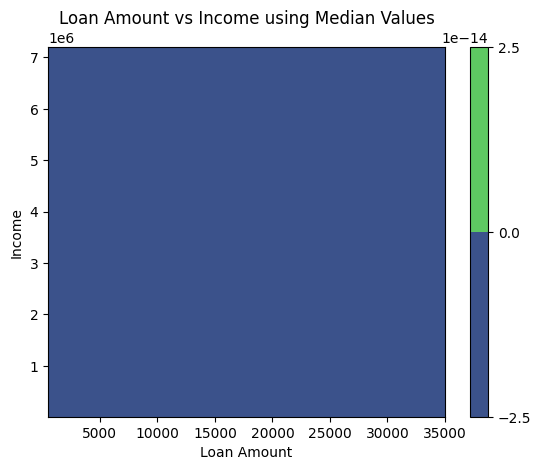

In [72]:
Xt, Yt = np.meshgrid(xt, yt)
h = plt.contourf(Xt, Yt, z)
plt.axis()
plt.colorbar()
plt.xlabel('Loan Amount')
plt.ylabel('Income')
plt.xlabel('Loan Amount')
plt.title('Loan Amount vs Income using Median Values')
plt.show()

The graph above shows the decision boundary made by the first decision classifier by perturbing the loan amount and income values and setting all other inputs to their median values. All predicted values are 0, indicating that neither loan amount nor income have a significant impact when all other features are at their median values. An explanation for this is that the data is unbalanced between classes with 22% in class 1 and 78% in class 0. Thus extrodinary values are needed for more than two features to impact the decision boundary.

The graph below displays the decision boundary made by perturbing the loan amount and income values and setting all other inputs equal to the values of a class 1 training sample. This demonstrates the values at which income and loan amount affect the boundary. Note that since a specific sample from the data was used, this method is biased and should not be used to draw any conclusions about our model.

In [66]:
xt = np.linspace(np.min(X['loan_amnt']), np.max(X['loan_amnt']), num=100)
yt = np.linspace(np.min(X['person_income']), np.max(X['person_income']),num =100)
z = list()
for i in range(len(xt)):
  l = list()
  for j in range(len(yt)):
      test = X.iloc[30].to_numpy()
      test[2] = xt[i]
      test[0] = yt[j]
      test = test.reshape(1,-1)
      test = sc.transform(test)
      l.append(t1.predict(test)[0])
  z.append(l)
z = np.array(z)

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

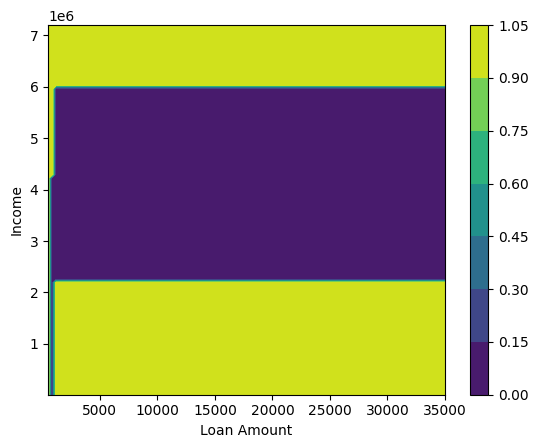

In [67]:
b = z
Xt, Yt = np.meshgrid(xt, yt)
h = plt.contourf(Xt, Yt, b)
plt.axis()
plt.colorbar()
plt.xlabel('Loan Amount')
plt.ylabel('Income')
plt.title('Loan Amount vs Income using Selected Values')
plt.show()

Faraj, F. (2020, December 15). The sensitivity analysis: A powerful yet underused tool for data scientists. Medium. https://towardsdatascience.com/the-sensitivity-analysis-a-powerful-yet-underused-tool-for-data-scientists-e553fa695976

### Task 2

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = bag.predict(X_test)


In [71]:
bag_results = metrics(y_test, y_pred)

Precision: 0.8490
Recall: 0.7485
F1 Score: 0.7956
Accuracy: 0.9162


In [55]:
skf = StratifiedKFold(n_splits=5)
bcv5results = cross_val_score(bag, X_train, y_train, cv=skf)
bcv5 = np.mean(bcv5results)

In [56]:
skf = StratifiedKFold(n_splits=10)
bcv10results = cross_val_score(bag, X_train, y_train, cv=skf)
bcv10 = np.mean(bcv10results)

In [14]:
skf = StratifiedKFold(n_splits=15)
bcv15results = cross_val_score(bag, X_train, y_train, cv=skf)
bcv15 = np.mean(bcv15results)

In [61]:
bcv5, bcv10, bcv15

(0.9135555555555556, 0.913888888888889, 0.9140555555555554)

AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators=100, random_state=0)
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)

In [73]:
boost_results = metrics(y_test, y_pred)

Precision: 0.8265
Recall: 0.7704
F1 Score: 0.7975
Accuracy: 0.9148


In [65]:
skf = StratifiedKFold(n_splits=5)
boostcv5results = cross_val_score(boost, X_train, y_train, cv=skf)
boostcv5 = np.mean(boostcv5results)

In [67]:
skf = StratifiedKFold(n_splits=10)
boostcv10results = cross_val_score(boost, X_train, y_train, cv=skf)
boostcv10 = np.mean(boostcv10results)

In [16]:
skf = StratifiedKFold(n_splits=15)
boostcv15_results = cross_val_score(boost, X_train, y_train, cv=skf)
boostcv15 = np.mean(boostcv15_results)

In [69]:
boostcv5, boostcv10, boostcv15

(0.9115, 0.9118055555555555, 0.9115)

**AdaBag**

Precision: 0.8490 \\
Recall: 0.7485 \\
F1 Score: 0.7956 \\
Accuracy: 0.9162 \\

**AdaBoost**

Precision: 0.8265 \\
Recall: 0.7704 \\
F1 Score: 0.7975 \\
Accuracy: 0.9148 \\

AdaBag had slightly better precision while AdaBoost had slightly better recall. Both had roughly the same F1 and accuracy scores. In terms of scoring metrics, both very similar.

Galantin, M. (2019, November 22). Forcing sklearn cross val score to use stratified k fold? Stack Overflow. https://stackoverflow.com/questions/59002684/forcing-sklearn-cross-val-score-to-use-stratified-k-fold

Muralidhar, K. S. V. (2021, February 22). What is Stratified Cross-Validation in Machine Learning? Medium. https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e

Pandian, S. (2022, February 17). K-Fold Cross Validation Technique and its Essentials. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/

scikit-learn. (2019). sklearn.model_selection.cross_val_score — scikit-learn 0.22 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

### Task 3

Confusion Matrix

In [82]:
for i, (train_index, test_index) in enumerate(skf.split(X_test, y_test)):
    x_testcv = X_test[test_index]
    y_testcv = y_test[test_index]
    y_predboost = boost.predict(x_testcv)
    y_predbag = bag.predict(x_testcv)
    y_dt = t3.predict(x_testcv)
    print("Decision Tree\n", confusion_matrix(y_testcv, y_dt))
    print("AdaBag\n", confusion_matrix(y_testcv, y_predbag))
    print("AdaBoost\n", confusion_matrix(y_testcv, y_predboost))
    break



Decision Tree
 [[450  17]
 [ 27 106]]
AdaBag
 [[447  20]
 [ 34  99]]
AdaBoost
 [[446  21]
 [ 30 103]]


#### T-Test

Decision Tree vs AdaBag

In [77]:
from scipy.stats import norm
std_error = np.sqrt(np.std(t3cv15_results)**2/len(t3cv15_results) + np.std(bcv15results)**2/len(bcv15results))
t_test = (bcv15 - t3cv15)/std_error
p = norm.cdf(-abs(t_test)) * 2
p

0.0006728937967491719

Decision Tree vs AdaBoost

In [78]:
from scipy.stats import norm
std_error = np.sqrt(np.std(t3cv15_results)**2/len(t3cv15_results) + np.std(boostcv15_results)**2/len(boostcv15_results))
t_test = (boostcv15 - t3cv15)/std_error
p = norm.cdf(-abs(t_test)) * 2
p

8.687247450247349e-07

AdaBag vs AdaBoost

In [18]:
from scipy.stats import norm
std_error = np.sqrt(np.std(boostcv15_results)**2/len(boostcv15_results) + np.std(bcv15results)**2/len(bcv15results))
t_test = (boostcv15 - bcv15)/std_error
p = norm.cdf(-abs(t_test)) * 2
p

-2.0594112814813603

In [79]:
t3cv15, boostcv15, bcv15

(0.9191666666666667, 0.9100277777777777, 0.9133333333333336)

All model comparisions had a p-value less than 0.05 indicating greater than 95% confidence that there is a statistical difference between each of them. From above, we see that decision tree had the greatest accuracy followed by AdaBag and AdaBoost.

Politi, M. (2022, July 17). Paired T-test to evaluate machine learning classifiers using Python. Medium. https://towardsdatascience.com/paired-t-test-to-evaluate-machine-learning-classifiers-1f395a6c93fa

Bias and Variance

In [19]:
np.std(t3cv15_results),np.std(boostcv15_results),np.std(bcv15results)

(0.002836055337355599, 0.004294879236290682, 0.004072453381342733)

Using the 15-fold cross validation results, the decsion tree had the lowest variance followed by AdaBag and AdaBoost. The decision tree also had the lowest bias, while AdaBoost had the highest bias. In conclusion, the decision tree had the best bias and variance. AdaBag was worse than the decision tree, but had better bias and variance than AdaBoost.